# ANALYST THE LIFE EXXPECTANCY DATA FROM WHO

## INTRODUCTION
For this project, I will serve as a data researcher for the International Headquarter of Empathy And Logic (IHEAL). My role involves analyzing data on GDP and life expectancy from the World Health Organization and the World Bank to support their argument that there is a correlation or pattern between a country's GDP and its life expectancy.

As the Vice President of Intuition and Systems at IHEAL stated:

"We believe there is an unjust connection between a nation's wealth and the life expectancy of its people, but we need data to convince those in power."

In this project, I will analyze, prepare, and plot data to address this issue meaningfully.

Key Question: Is there a correlation between a country's GDP and its life expectancy?

GDP Source: World Bank national accounts data, and OECD National Accounts data files.

Life Expectancy Data Source: World Health Organization.

In [1]:
# import model need to use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from IPython.display import display
import warnings

data = pd.read_csv('all_data.csv')
data.head()
# Make a brief pivort data to check the data overall.
pivot_country = data.pivot_table(index = 'Country',
                            values = ['Life expectancy at birth (years)','GDP'],
                            aggfunc={'Life expectancy at birth (years)': 'mean',
                                     'GDP': 'mean'}).reset_index()

# Function to format numbers as currency
def format_currency(x):
    return "${:,.2f}".format(x)

# Apply currency formatting to GDP columns
gdp_columns = [col for col in pivot_country.columns if 'GDP' in col]
pivot_country[gdp_columns] = pivot_country[gdp_columns].map(format_currency)
display(pivot_country)

,Country,GDP,Life expectancy at birth (years)
0,Chile,"$169,788,845,015.31",78.94375
1,China,"$4,957,713,750,000.00",74.26250
2,Germany,"$3,094,775,625,000.00",79.65625
3,Mexico,"$976,650,625,000.00",75.71875
4,United States of America,"$14,075,000,000,000.00",78.06250
5,Zimbabwe,"$9,062,579,595.06",50.09375


# Explore and Explain Data
The dataset contains information on six countries. Here’s a summary of the key findings:

United States has the highest GDP among all the countries, with an average of $14 trillion. It ranks third in terms of life expectancy.

Zimbabwe has the lowest GDP, with an average of $9 billion. It also has the lowest life expectancy, with a mean age of 50 years.

Germany has the highest life expectancy among the countries, and its GDP is approximately $3 trillion.

## Summary of Key Points:

### GDP:
Highest: United States - 14 trillion
Lowest: Zimbabwe - 9 billion

### Life Expectancy:
Highest: Germany
Lowest: Zimbabwe - 50 years

Notes:
United States: High GDP but lower life expectancy compared to some other countries.
Zimbabwe: Low GDP and lowest life expectancy.
Germany: High life expectancy with a substantial GDP.


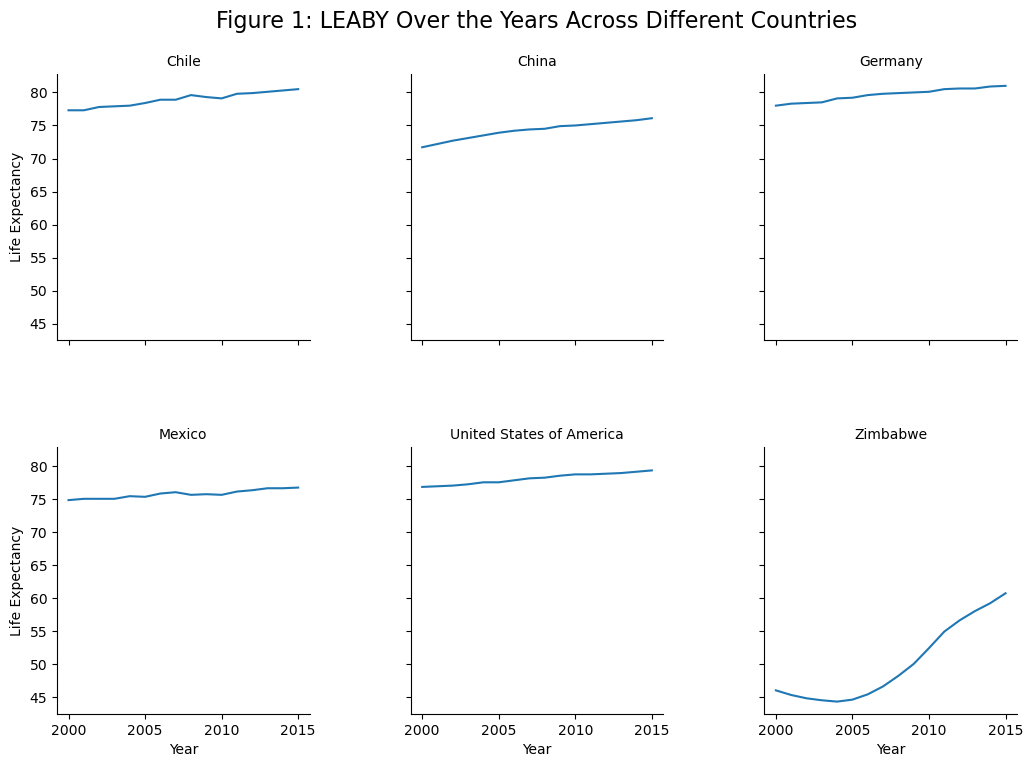

Year,Country,2000,2014,percentage_increase
0,Chile,77.3,80.3,3.880983
1,China,71.7,75.8,5.718271
2,Germany,78.0,80.9,3.717949
3,Mexico,74.8,76.6,2.406417
4,United States of America,76.8,79.1,2.994792
5,Zimbabwe,46.0,59.2,28.695652


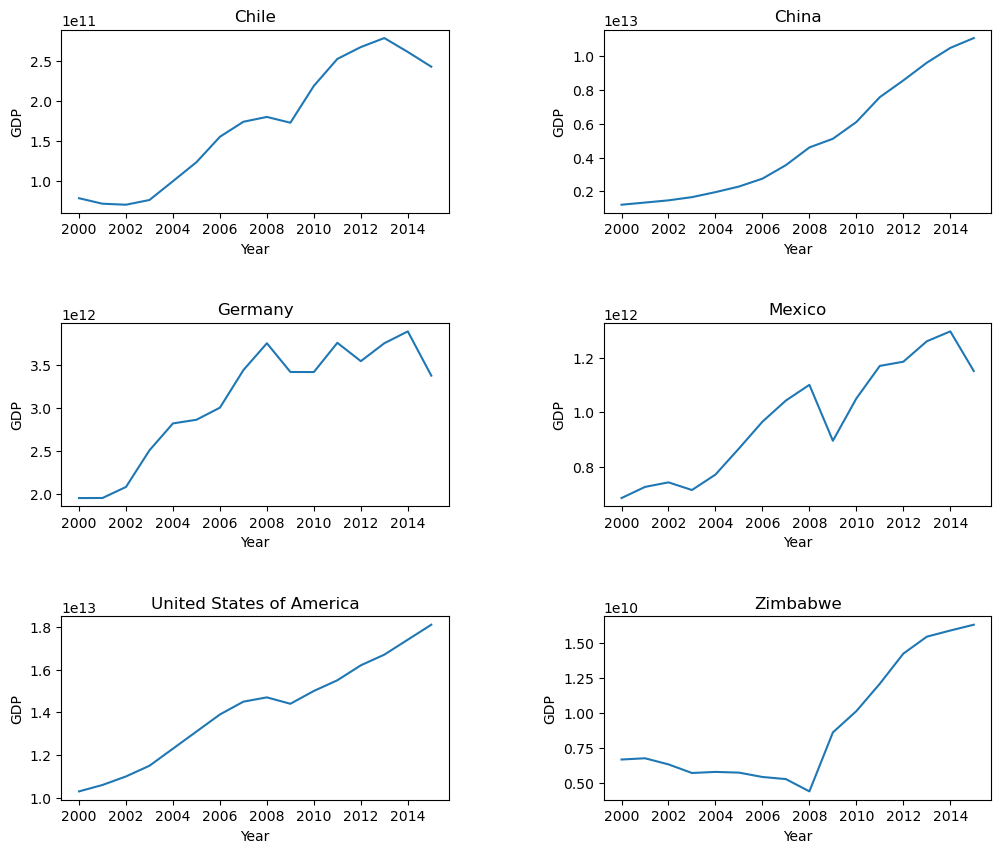

Year,Country,2000,2014,percentage_increase
0,Chile,7.786093e+10,2.609900e+11,235.200200
1,China,1.211350e+12,1.048240e+13,765.348578
2,Germany,1.949950e+12,3.890610e+12,99.523578
3,Mexico,6.836480e+11,1.298460e+12,89.931076
4,United States of America,1.030000e+13,1.740000e+13,68.932039
5,Zimbabwe,6.689958e+09,1.589105e+10,137.535874


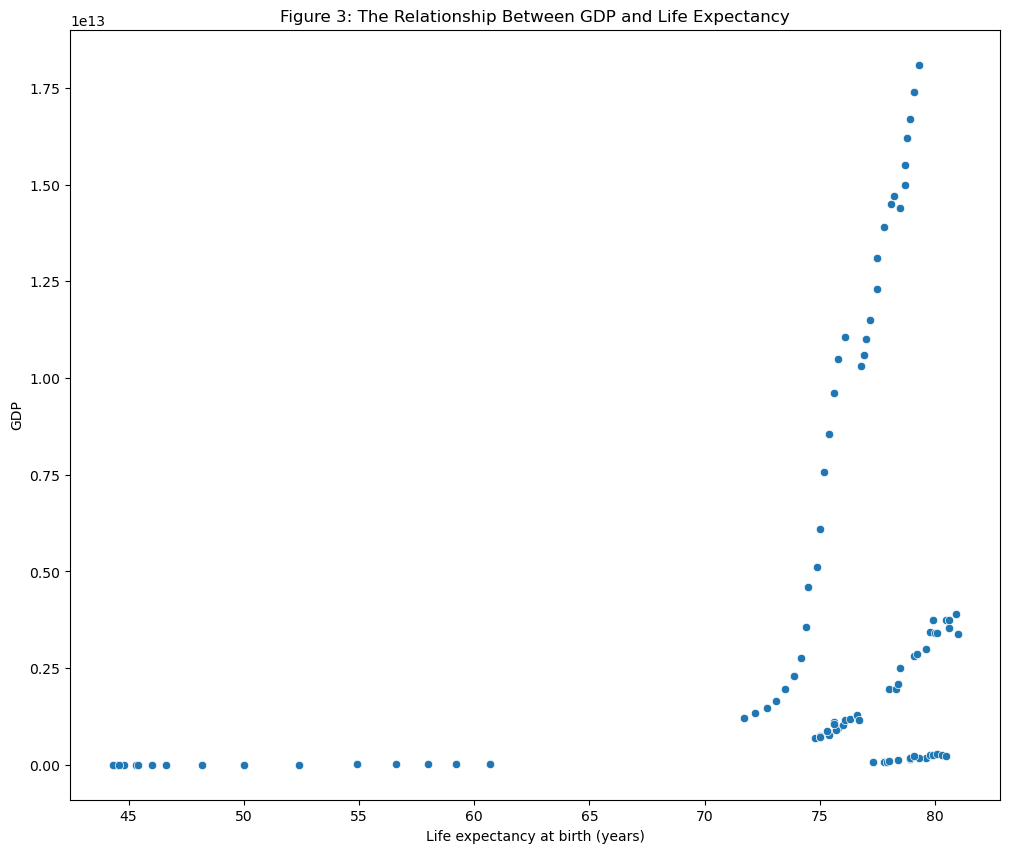

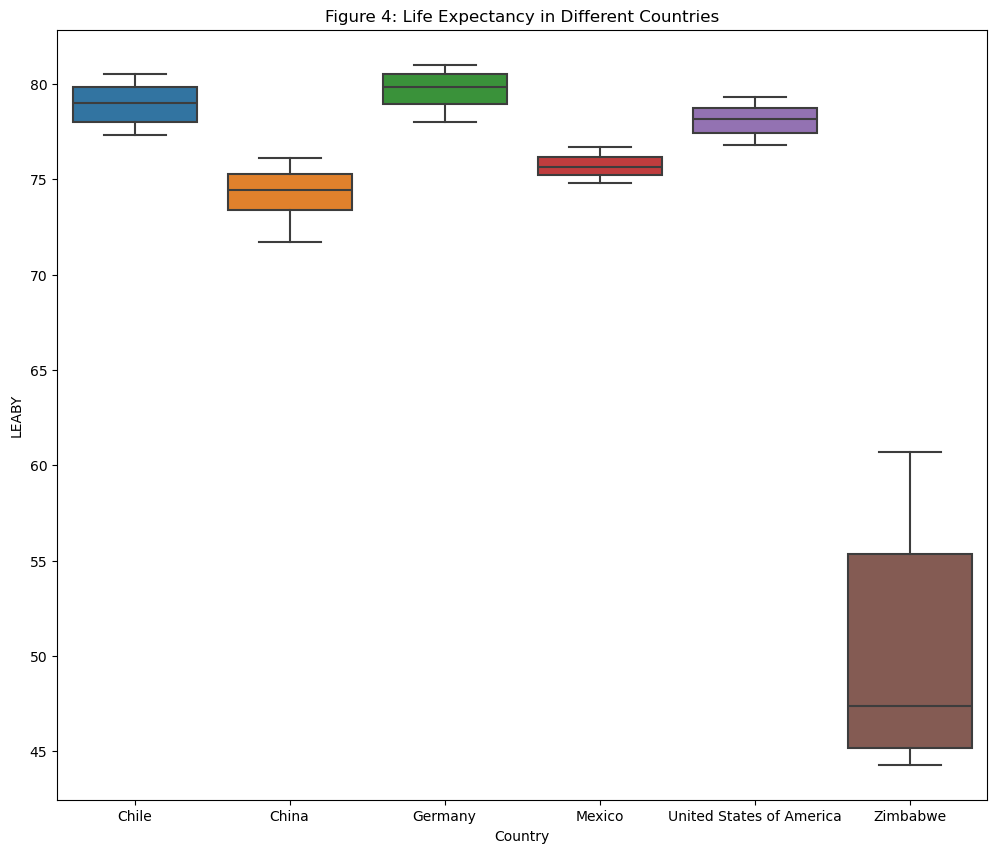

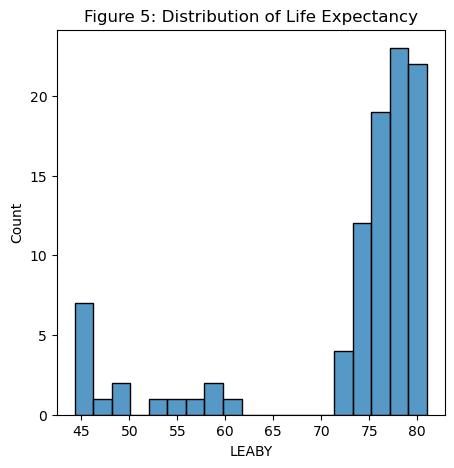

In [2]:
# Set the figure size and rename life expectancy columns to LEABY
figure_size = (12, 10)
data.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)

# Suppress specific FutureWarnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# 1. Has life expectancy increased over time in the six nations?
## Using FacetGrid
g = sns.FacetGrid(data, col='Country', col_wrap=3, height=4)
g.map(sns.lineplot, 'Year', 'LEABY')
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy')
g.fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
g.fig.suptitle('Figure 1: LEABY Over the Years Across Different Countries', fontsize=16)
plt.show()

# Calculate percentage increase in LEABY from 2000 to 2014 for all countries
filter_data = data[data['Year'].isin([2000, 2014])]
pivot_leaby = filter_data.pivot_table(index='Country', values='LEABY', columns='Year', aggfunc='mean').reset_index()
pivot_leaby['percentage_increase'] = ((pivot_leaby[2014] - pivot_leaby[2000]) / pivot_leaby[2000]) * 100
display(pivot_leaby)

# 2. Has GDP increased over time in the six nations?
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=figure_size)
axes = axes.flatten()
countries = data.Country.unique()
for i, country in enumerate(countries):
    axes[i].plot(data.Year[data['Country'] == country], data.GDP[data['Country'] == country])
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP')
fig.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

# Calculate percentage increase in GDP from 2000 to 2014 for all countries
pivot_gdp = filter_data.pivot_table(index='Country', values='GDP', columns='Year', aggfunc='mean').reset_index()
pivot_gdp['percentage_increase'] = ((pivot_gdp[2014] - pivot_gdp[2000]) / pivot_gdp[2000]) * 100
display(pivot_gdp)

# 3. Is there a correlation between GDP and life expectancy of a country?
plt.figure(figsize=figure_size)
sns.scatterplot(y=data['GDP'], x=data['LEABY'], data=data)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.title('Figure 3: The Relationship Between GDP and Life Expectancy')
plt.show()

# 4. What is the average life expectancy in these nations?
plt.figure(figsize=figure_size)
sns.boxplot(data=data, y='LEABY', x='Country')
plt.title('Figure 4: Life Expectancy in Different Countries')
plt.show()

# 5. What is the distribution of that life expectancy?
plt.figure(figsize=(5,5))
sns.histplot(data['LEABY'])
plt.title('Figure 5: Distribution of Life Expectancy')
plt.savefig('figure5.png')
plt.show()


## Detailed Analysis

### Figure 1: Illustrates the life expectancy trends for six countries from 2000 to 2014.
Notably, Zimbabwe experienced the most rapid increase in life expectancy, 
rising from 40 years in 2004 to a peak of 60 years in 2014 (increase 28%). 
While other countries also showed improvements in life expectancy over this period, their increases were not as pronounced as Zimbabwe's (only from 2% to 5.6 %).

### Figure 2: Show the increase in GDP for 6 countries. 
Notably the yellow line is GPD of China increase rapidly nearly 766% from 2000 to 2014.
GDP has generally increased over time for all countries, with notable rapid increases in China and the USA.

### Figure 3: The Relationship Between GDP and Life Expectancy
There appears to be a positive correlation between GDP and life expectancy, meaning that generally, countries with higher GDP tend to 
have higher life expectancy.

### Figure 4: Life Expectancy in Different Countries
Chile: Median life expectancy ~78 to 80 years, gradual increase.
China: Steady increase from ~72 to 76 years.
Germany: Highest median life expectancy, ~78 to 81 years.
Mexico: Median life expectancy ~75 to 77 years, stable trend.
United States: Median life expectancy ~77 to 79 years, steady increase.
Zimbabwe: Lowest life expectancy, increasing from ~44 to 60 years.

### Figure 5: Distribution of Life Expectancy
Most life expectancy values are between 70 and 80 years.
Peak around 75 to 80 years.
Fewer values below 60 years, mainly from early Zimbabwe data.
Right-skewed distribution, with most countries having high life expectancy and a general upward trend over time.

# Conclusion:
From 2000 to 2014, the analysis of GDP and life expectancy across six nations shows clear trends:  

Chile: Steady economic growth and improved healthcare led to increased life expectancy.  
China: Rapid economic expansion and significant healthcare investments resulted in substantial gains in life expectancy.  
Germany: A strong healthcare system and high living standards maintained high life expectancy.  
Mexico: Gradual improvements in economy and healthcare contributed to a modest rise in life expectancy.  
United States: Advanced healthcare and medical technology led to gradual increases in life expectancy, despite challenges.  
Zimbabwe: Significant progress in life expectancy reflects efforts to address severe health and economic challenges.  

Overall, the data indicates that economic growth often supports better health outcomes, though disparities persist, highlighting the need for continued efforts to improve healthcare access and address socio-economic inequalities.s.

In [3]:
import plotly.io as pio
pio.renderers.default = 'notebook'